In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

Using TensorFlow backend.


In [ ]:
df=pd.read_csv('airline-passengers.csv')


In [ ]:
df['Month'], df['Passengers'] = df['"Month","Passengers"'].str.split(',', 1).str
df=df.drop('"Month","Passengers"',axis=1)

In [90]:
df['Passengers']=df['Passengers'].astype(float)
df.info()
actual_values=df['Passengers']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
Month             144 non-null object
Passengers        144 non-null float64
New Passengers    144 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [24]:
new_pass=[]
print(len(df.Passengers))
for i in range(0,len(df.Passengers)):
  if i > len(df.Passengers)-5:
    new_pass.append(df.Passengers[i])
  else:
    new_pass.append(df.Passengers[i+4])
    #df.loc['New Passengers']=

df['New Passengers']=new_pass
df['New Passengers']=df['New Passengers'].astype(float)


144


In [ ]:
x=df.drop('Month',axis=1)
y=df["New Passengers"].values

In [59]:
x.shape,y.shape

((144, 2), (144,))

In [65]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(x)
y = y.reshape(-1,1)
y.shape
y = sc.fit_transform(y)
len(y)

144

In [108]:
X_train = []
y_train = []
for i in range(5, 144):
    X_train.append(training_set_scaled[i-5:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape,y_train.shape

((139, 5, 1), (139,))

In [110]:

X_test = []

for i in range(5, 96):
    X_test.append(y[i-5:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(91, 5, 1)

In [31]:
xtrain,ytrain,xtest,ytest=train_test_split(x,y, test_size=0.2, random_state=3)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((115, 2), (115,), (29, 2), (29,))

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM((1),input_shape=(X_train.shape[1], 1), return_sequences=False))


In [ ]:
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [97]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [98]:
history=model.fit(X_train,y_train,epochs=100)

Epoch 1/100
139/139 [==============================] - 1s 5ms/step - loss: 0.4602 - acc: 0.0072
Epoch 2/100
139/139 [==============================] - 0s 186us/step - loss: 0.4549 - acc: 0.0072
Epoch 3/100
139/139 [==============================] - 0s 174us/step - loss: 0.4494 - acc: 0.0072
Epoch 4/100
139/139 [==============================] - 0s 175us/step - loss: 0.4439 - acc: 0.0072
Epoch 5/100
139/139 [==============================] - 0s 226us/step - loss: 0.4383 - acc: 0.0072
Epoch 6/100
139/139 [==============================] - 0s 188us/step - loss: 0.4331 - acc: 0.0072
Epoch 7/100
139/139 [==============================] - 0s 199us/step - loss: 0.4278 - acc: 0.0072
Epoch 8/100
139/139 [==============================] - 0s 198us/step - loss: 0.4227 - acc: 0.0072
Epoch 9/100
139/139 [==============================] - 0s 295us/step - loss: 0.4176 - acc: 0.0072
Epoch 10/100
139/139 [==============================] - 0s 321us/step - loss: 0.4128 - acc: 0.0072
Epoch 11/100
139/139 

((91, 1), (91, 5, 1))

In [ ]:
results=model.predict(X_test)

In [ ]:
model.compile(loss='mean_absolute_error',optimizer='SGD',metrics=['accuracy'])

In [112]:
history2=model.fit(X_train,y_train,epochs=50)

Epoch 1/50
139/139 [==============================] - 1s 6ms/step - loss: 0.1355 - acc: 0.0072
Epoch 2/50
139/139 [==============================] - 0s 180us/step - loss: 0.1348 - acc: 0.0072
Epoch 3/50
139/139 [==============================] - 0s 184us/step - loss: 0.1337 - acc: 0.0072
Epoch 4/50
139/139 [==============================] - 0s 178us/step - loss: 0.1327 - acc: 0.0072
Epoch 5/50
139/139 [==============================] - 0s 190us/step - loss: 0.1319 - acc: 0.0144
Epoch 6/50
139/139 [==============================] - 0s 192us/step - loss: 0.1307 - acc: 0.0144
Epoch 7/50
139/139 [==============================] - 0s 210us/step - loss: 0.1298 - acc: 0.0144
Epoch 8/50
139/139 [==============================] - 0s 219us/step - loss: 0.1288 - acc: 0.0144
Epoch 9/50
139/139 [==============================] - 0s 233us/step - loss: 0.1278 - acc: 0.0144
Epoch 10/50
139/139 [==============================] - 0s 198us/step - loss: 0.1268 - acc: 0.0144
Epoch 11/50
139/139 [==========

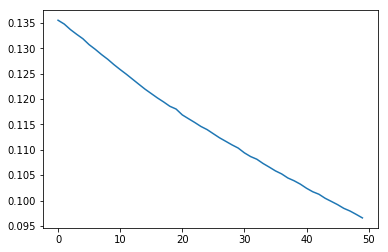

In [118]:
plt.plot(history.history['loss'])
plt.show()